(393, 700)


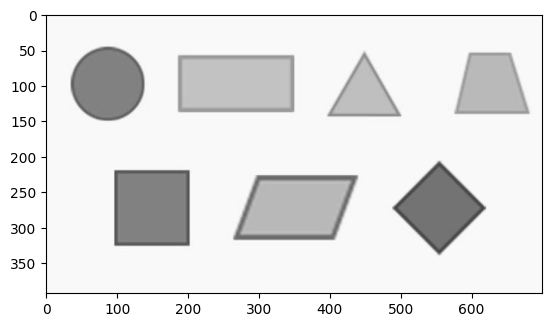

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def cv2_imshow(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)


PATH = 'images/coins/euro.jpg'

image = cv2.imread(PATH)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

print(gray.shape)

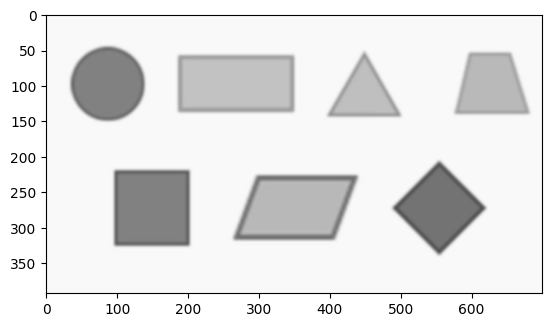

In [11]:
# ukuran kernel makin besar, semakin blur
# ukuran kernel ditentukan berdasarkan seberapa besar ukuran gambar
# semakin besar gambar, ukuran kernel semakin besar agar cukup untuk
# memblurkan gambar
# jika gambar kurang blur, garis-garis di dalam koin akan ikut muncul
# dan proses findCountour akan gagal
# PESO_kernel = (9, 9)
# RUPIAH_kernel = (15, 15)
blur = cv2.GaussianBlur(gray, (9, 9), 0)
cv2_imshow(blur)

Pixel yang berada di atas max-value sudah pasti edge dan pixel di bawah min-value pasti bukan edge. Pixel yg berada di tengah-tengah, tergantung.
Jika connected dengan sure-edge, pixel menjadi edge. dan sebaliknya

min value:=30 dan max value:=150
ukuran kernel Sobel: 3x3

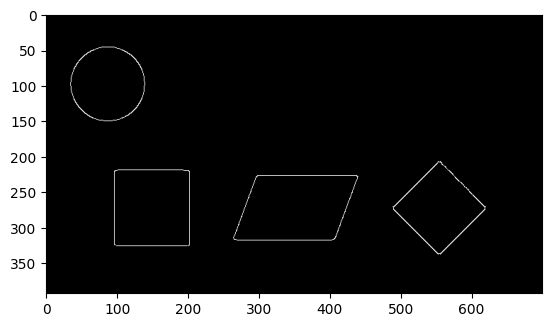

In [12]:
# PESO_THRESH = 10, 240
# RUPIAH_THRES = 10, 250
canny = cv2.Canny(blur, 10, 240)
cv2_imshow(canny)

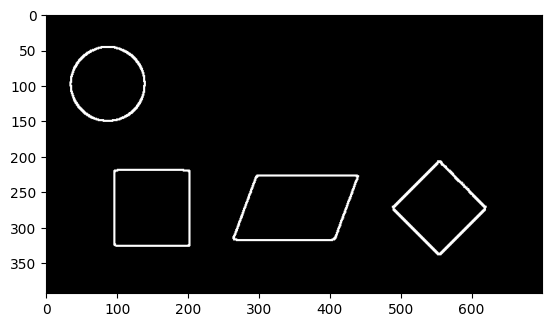

In [13]:
kernel = np.ones((3, 3), np.uint8)
morph = cv2.morphologyEx(canny, cv2.MORPH_DILATE, kernel, iterations=1)
cv2_imshow(morph)

coins in the image: 4


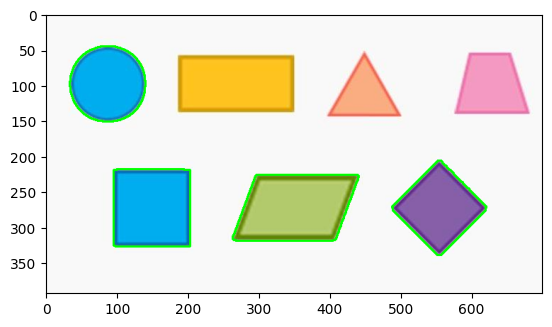

In [14]:
# RETR_EXTERNAL => hanya memperhitungkan external contours
# CHAIN_APPROX_EDGES => untuk memperhitungkan contours, setiap titik di edges
#                       diperhitungkan
(cnt, hierarchy) = cv2.findContours(morph.copy(), cv2.RETR_EXTERNAL,
                                    cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
plt.imshow(rgb)

print("coins in the image:", len(cnt))